In [1]:
pip install gdal

In [2]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [3]:
import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt
from google.colab import drive
import numpy as np
from rasterio.merge import merge
import glob
import os

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
 fp = r'/content/drive/MyDrive/NE1_LR_LC.tif'
 raster = rasterio.open(fp)
 type(raster)

rasterio.io.DatasetReader

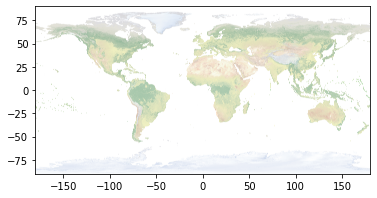

In [6]:
show(raster)

Read raster file properties

In [7]:
# Projection
raster.crs

CRS.from_epsg(4326)

In [8]:
raster.transform

Affine(0.02222222222222, 0.0, -180.0,
       0.0, -0.02222222222222, 90.0)

In [9]:
raster.width

16200

In [10]:
raster.height

8100

In [11]:
raster.count

3

In [12]:
raster.bounds

BoundingBox(left=-180.0, bottom=-89.99999999998198, right=179.99999999996396, top=90.0)

In [13]:
raster.driver

'GTiff'

In [14]:
raster.nodatavals

(None, None, None)

In [15]:
raster.meta

{'count': 3,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 8100,
 'nodata': None,
 'transform': Affine(0.02222222222222, 0.0, -180.0,
       0.0, -0.02222222222222, 90.0),
 'width': 16200}

Get raster bands

In [16]:
band1 = raster.read(1)
type(band1)

numpy.ndarray

In [17]:
band1.dtype

dtype('uint8')

Band statistics

In [18]:
array = raster.read()
stats = []
for band in array:
  stats.append({
  'min': band.min(),
  'mean': band.mean(),
  'median': np.median(band),
  'max': band.max()}) 

print(stats)

[{'min': 98, 'mean': 242.95207451607988, 'median': 255.0, 'max': 255}, {'min': 143, 'mean': 244.75367626886145, 'median': 255.0, 'max': 255}, {'min': 130, 'mean': 238.9592670019814, 'median': 255.0, 'max': 255}]


Clipping out North America

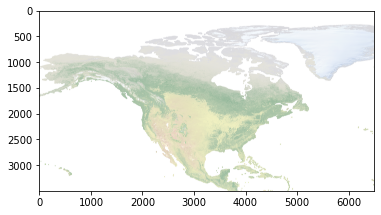

In [19]:
full_img = raster.read()
clipped_img1 = full_img[:, 0:3500, 500:7000]
show(clipped_img1)

Clipping out South America

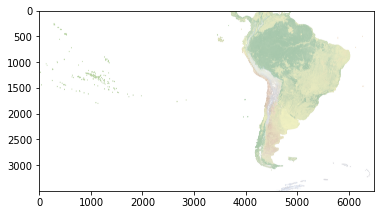

In [20]:
clipped_img2 = full_img[:, 3500:7000, 500:7000]
show(clipped_img2)